# Following steps have been taken in this assignment
1-Data cleaning
2-Machine learning algo implementation with cross validation
3-Roc curve with 95% confidance intrval

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

import warnings # supress warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel('Copy of featuresNEW_12hrs.xlsx') 
#df.head

In [4]:
#print(df.info())

<AxesSubplot:>

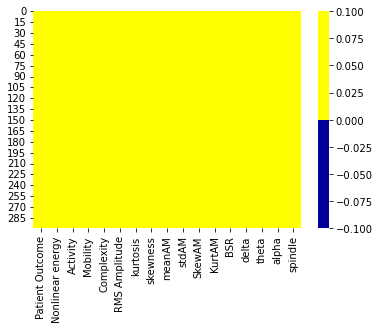

In [6]:
# Check for missing data
cols = df.columns[:17] # first 17 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is not missing. blue is  missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [7]:

# % of missing values
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Patient Outcome - 0%
Nonlinear energy - 0%
Activity - 0%
Mobility - 0%
Complexity - 0%
RMS Amplitude - 0%
kurtosis - 0%
skewness - 0%
meanAM - 0%
stdAM - 0%
SkewAM - 0%
KurtAM - 0%
BSR - 0%
delta - 0%
theta - 0%
alpha - 0%
spindle - 0%
beta - 0%
total - 0%
delta_tot - 0%
theta_tot - 0%
alpha_tot - 0%
spindle_tot - 0%
beta_tot - 0%
alpha_delta - 0%
theta_delta - 0%
spindle_delta - 0%
beta_delta - 0%
alpha_theta - 0%
spindle_theta - 0%
beta_theta - 0%
fhtife1 - 0%
fhtife2 - 0%
fhtife3 - 0%
fhtife4 - 0%
sef - 0%
df - 0%
svd_ent - 0%
H_spec - 0%
SE - 0%
saen - 0%
abs(renyi) - 0%
abs(shan) - 0%
perm_entr - 0%
FD - 0%


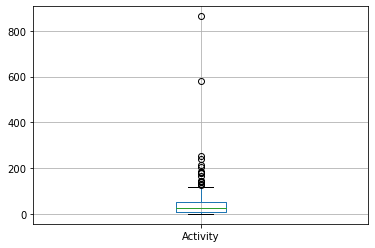

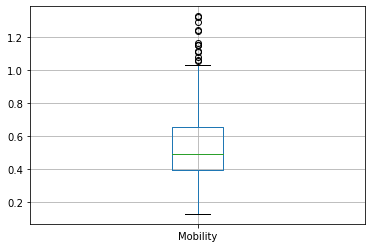

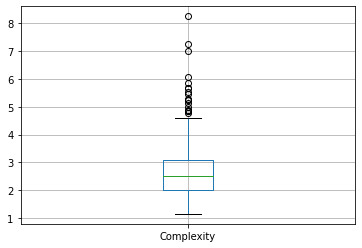

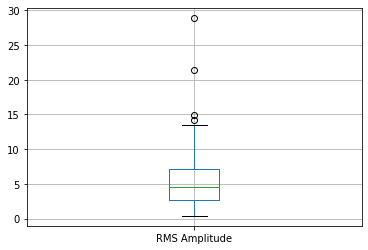

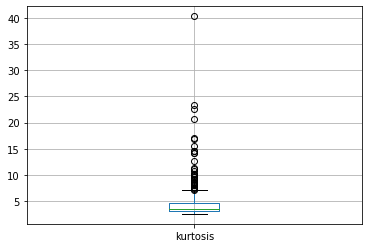

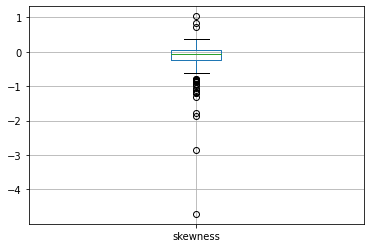

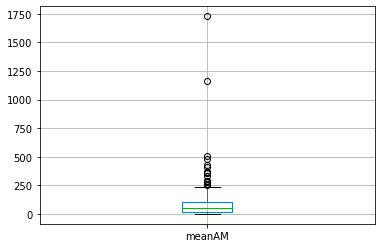

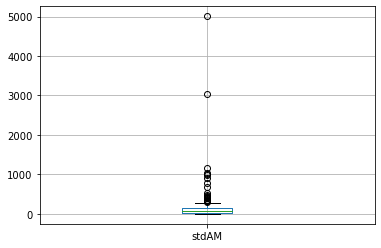

In [8]:
#Making box plot of the data to see if there any outliers
for column in df.iloc[:,2:10]:
    plt.figure()
    df.boxplot([column])
   

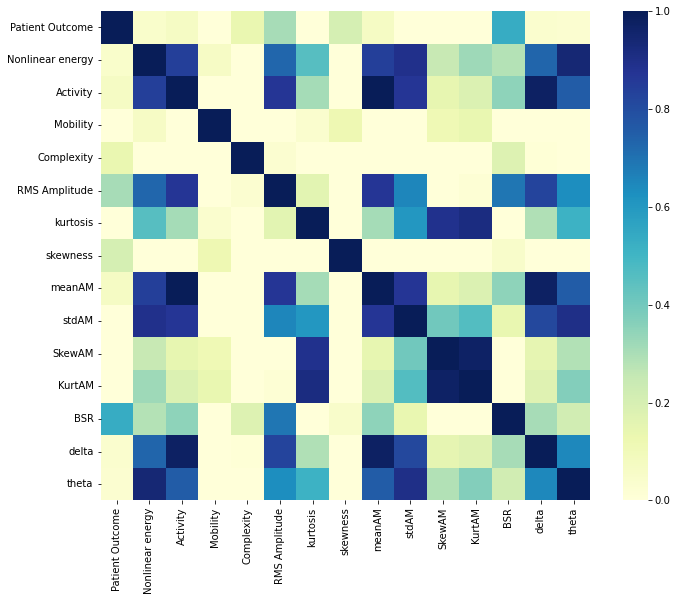

In [9]:
 #Correlation Matrix (heatmap style)  
#Identify the relationship across all the numeric features
corrmat = df.iloc[:,:15].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,vmin = 0,vmax=1,square=True,cmap="YlGnBu",ax=ax)
plt.show() #not mix with other similar graph


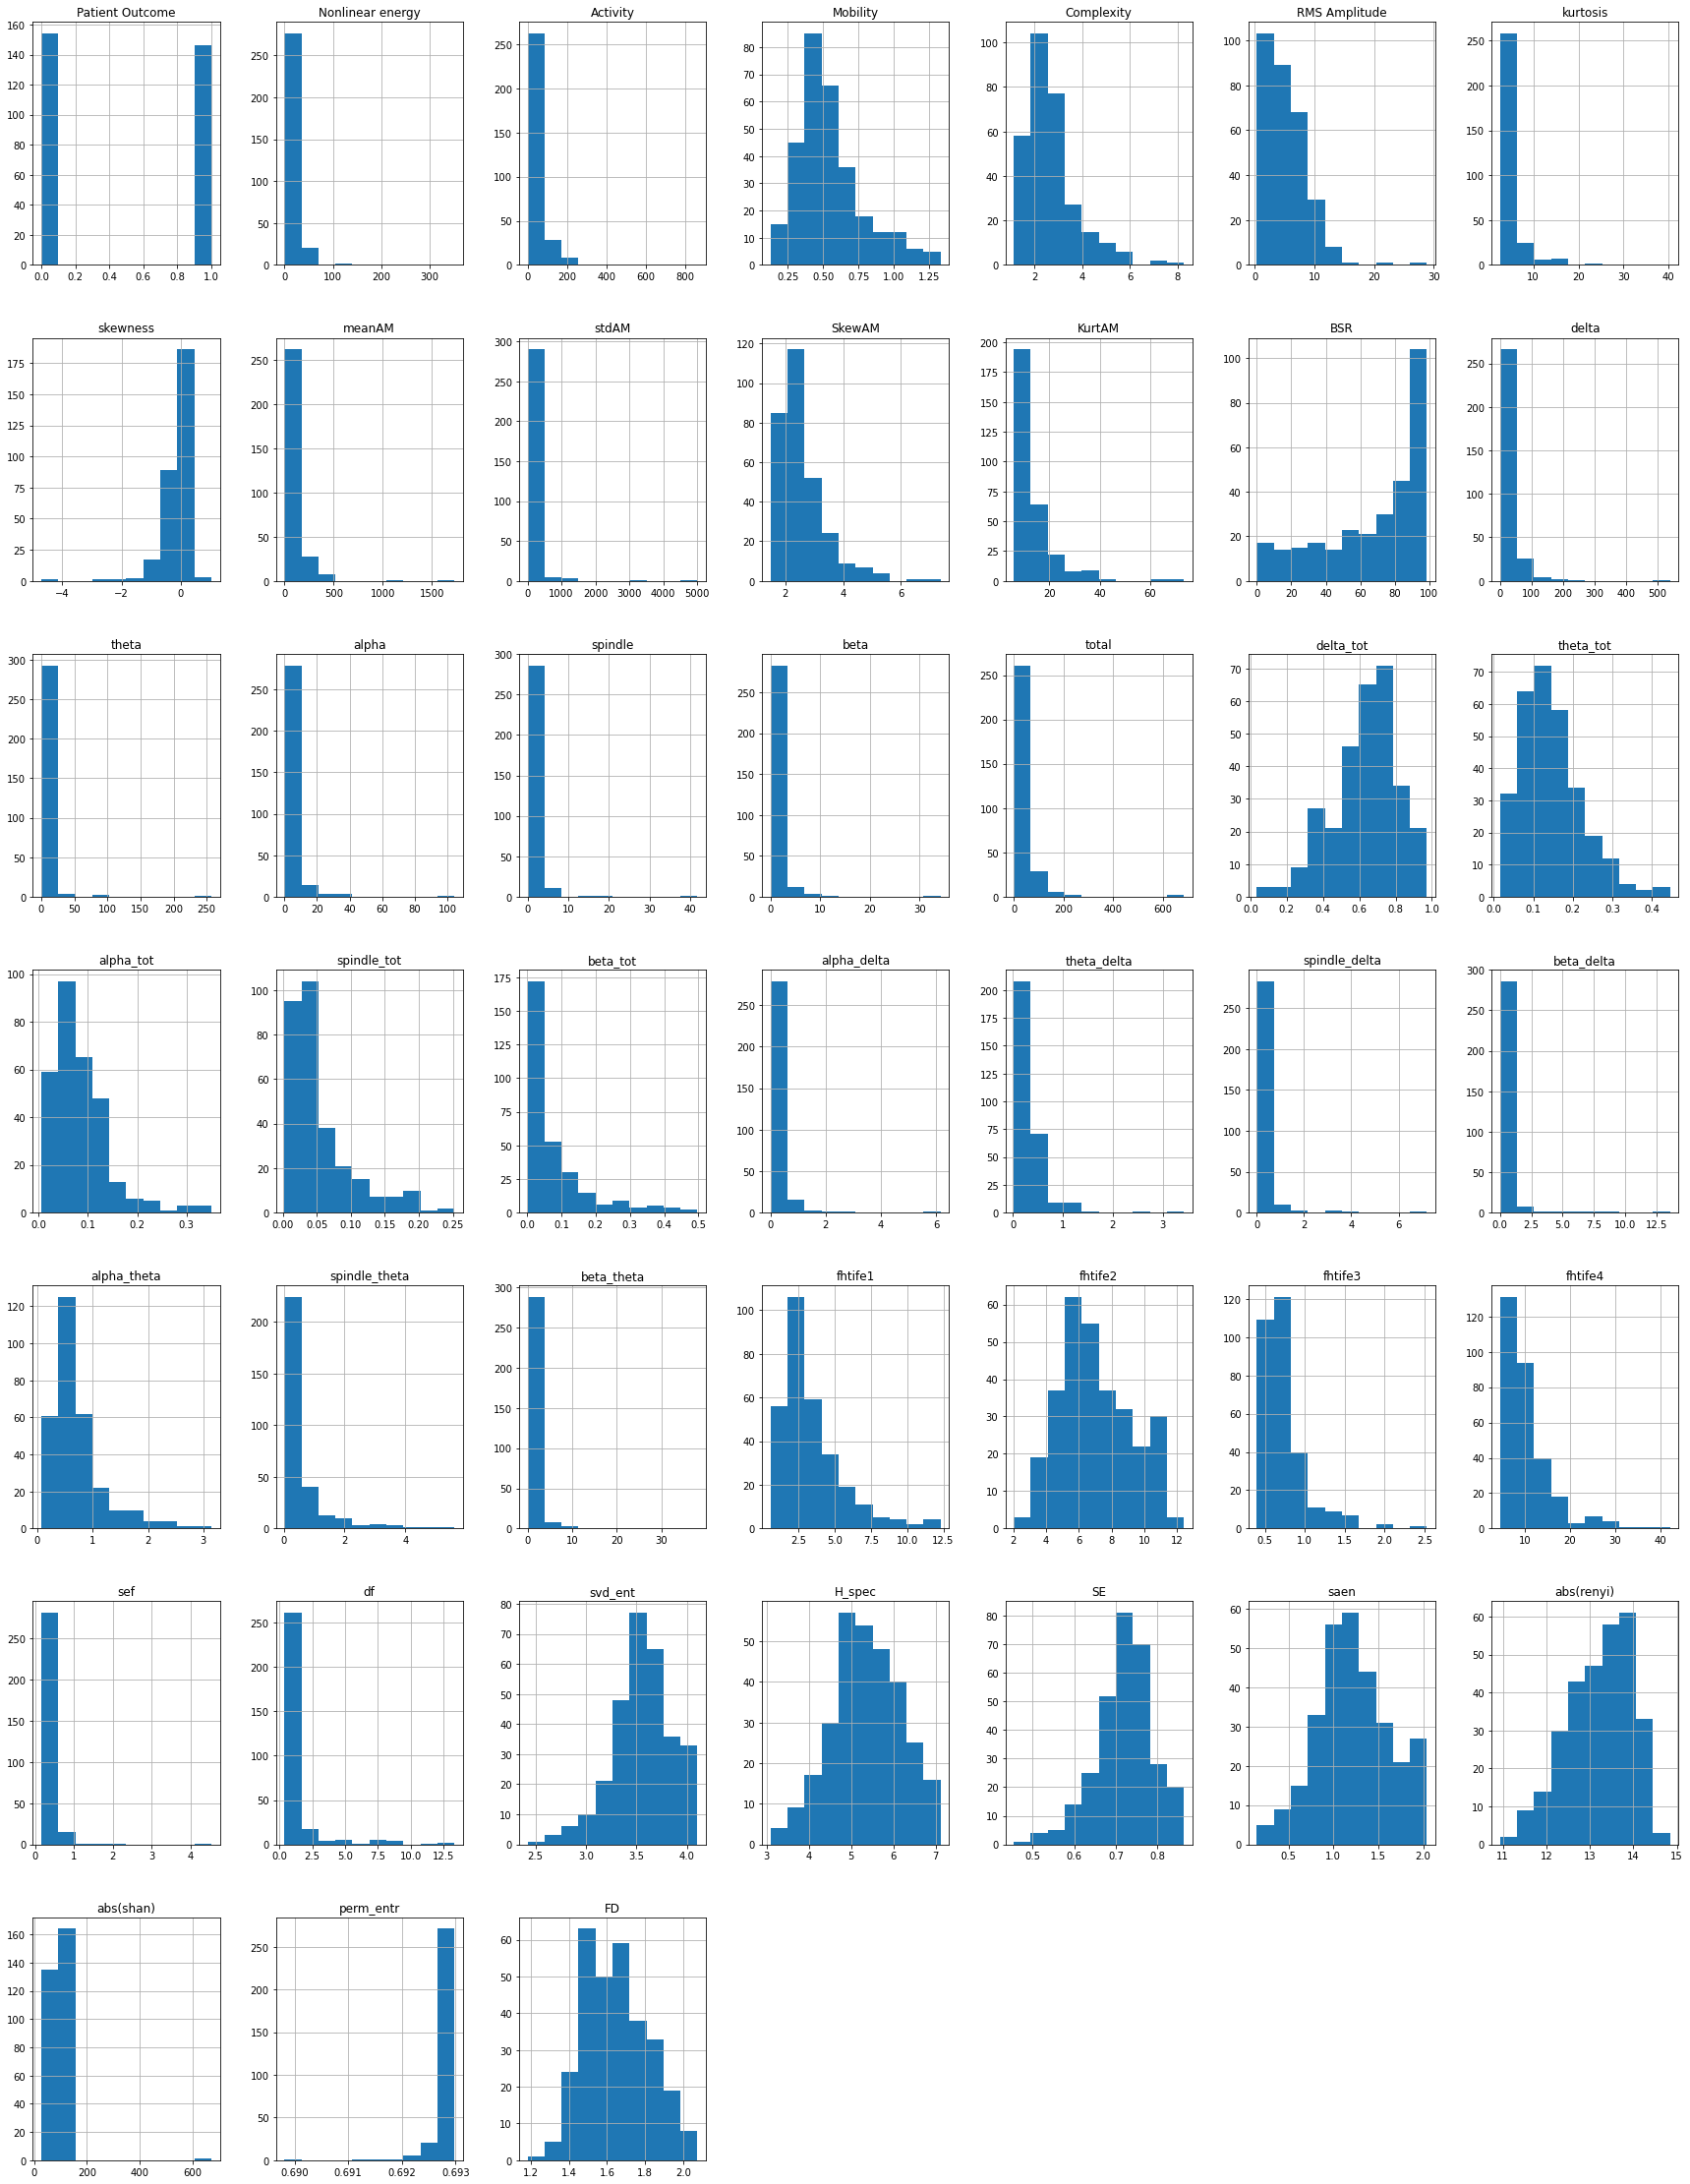

In [10]:
#To visualize the distribution pattern of the data
df.hist(figsize=(30,40))
plt.show()

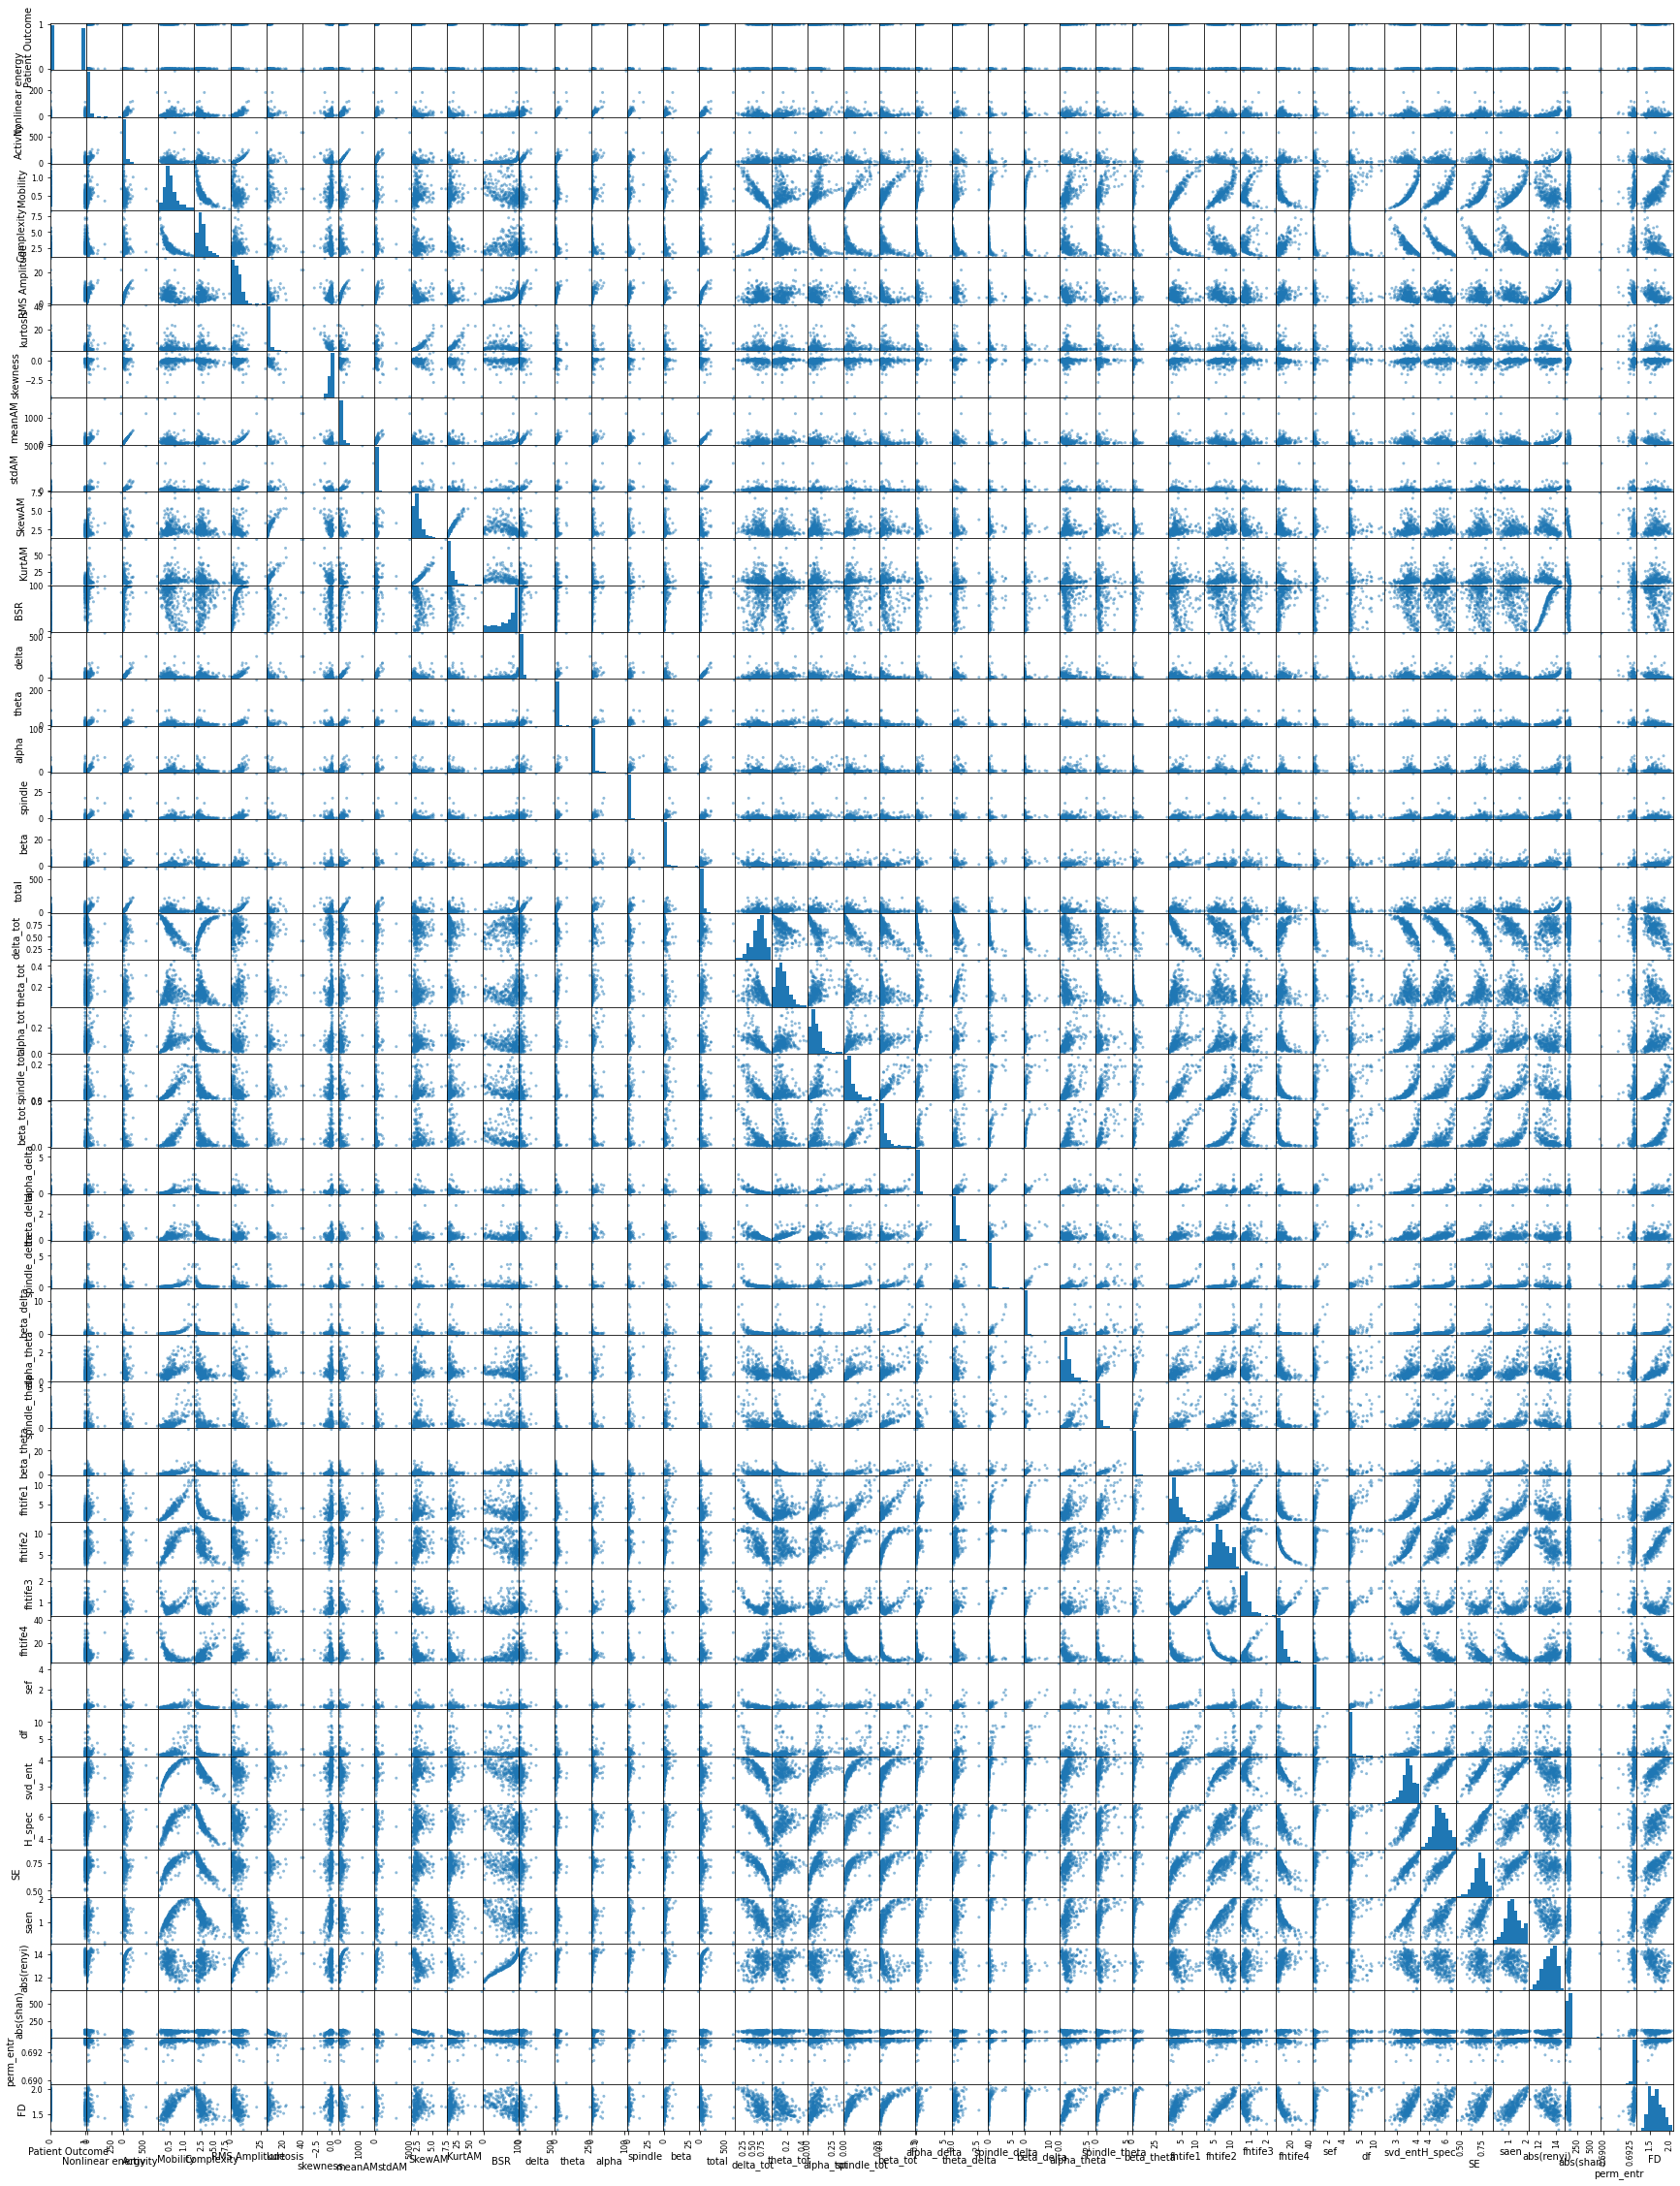

In [11]:
#more exploration of data through scatter plot and visualize the outlier 
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(30,40))
plt.show()

In [12]:
#Code inspiration from-https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame
from scipy import stats
#Z-transformation to find and remove outliers
def drop_numerical_outliers(df, z_thresh=5):
    # Constrains will contain `True` or `False` depending on if it is a value below the threshold.
    constrains = df.select_dtypes(include=[np.number]) \
        .apply(lambda x: np.abs(stats.zscore(x)) < z_thresh) \
        .all(axis=1)
    # Drop (inplace) values set to be rejected
    df.drop(df.index[~constrains], inplace=True)

In [13]:
drop_numerical_outliers(df)
#df

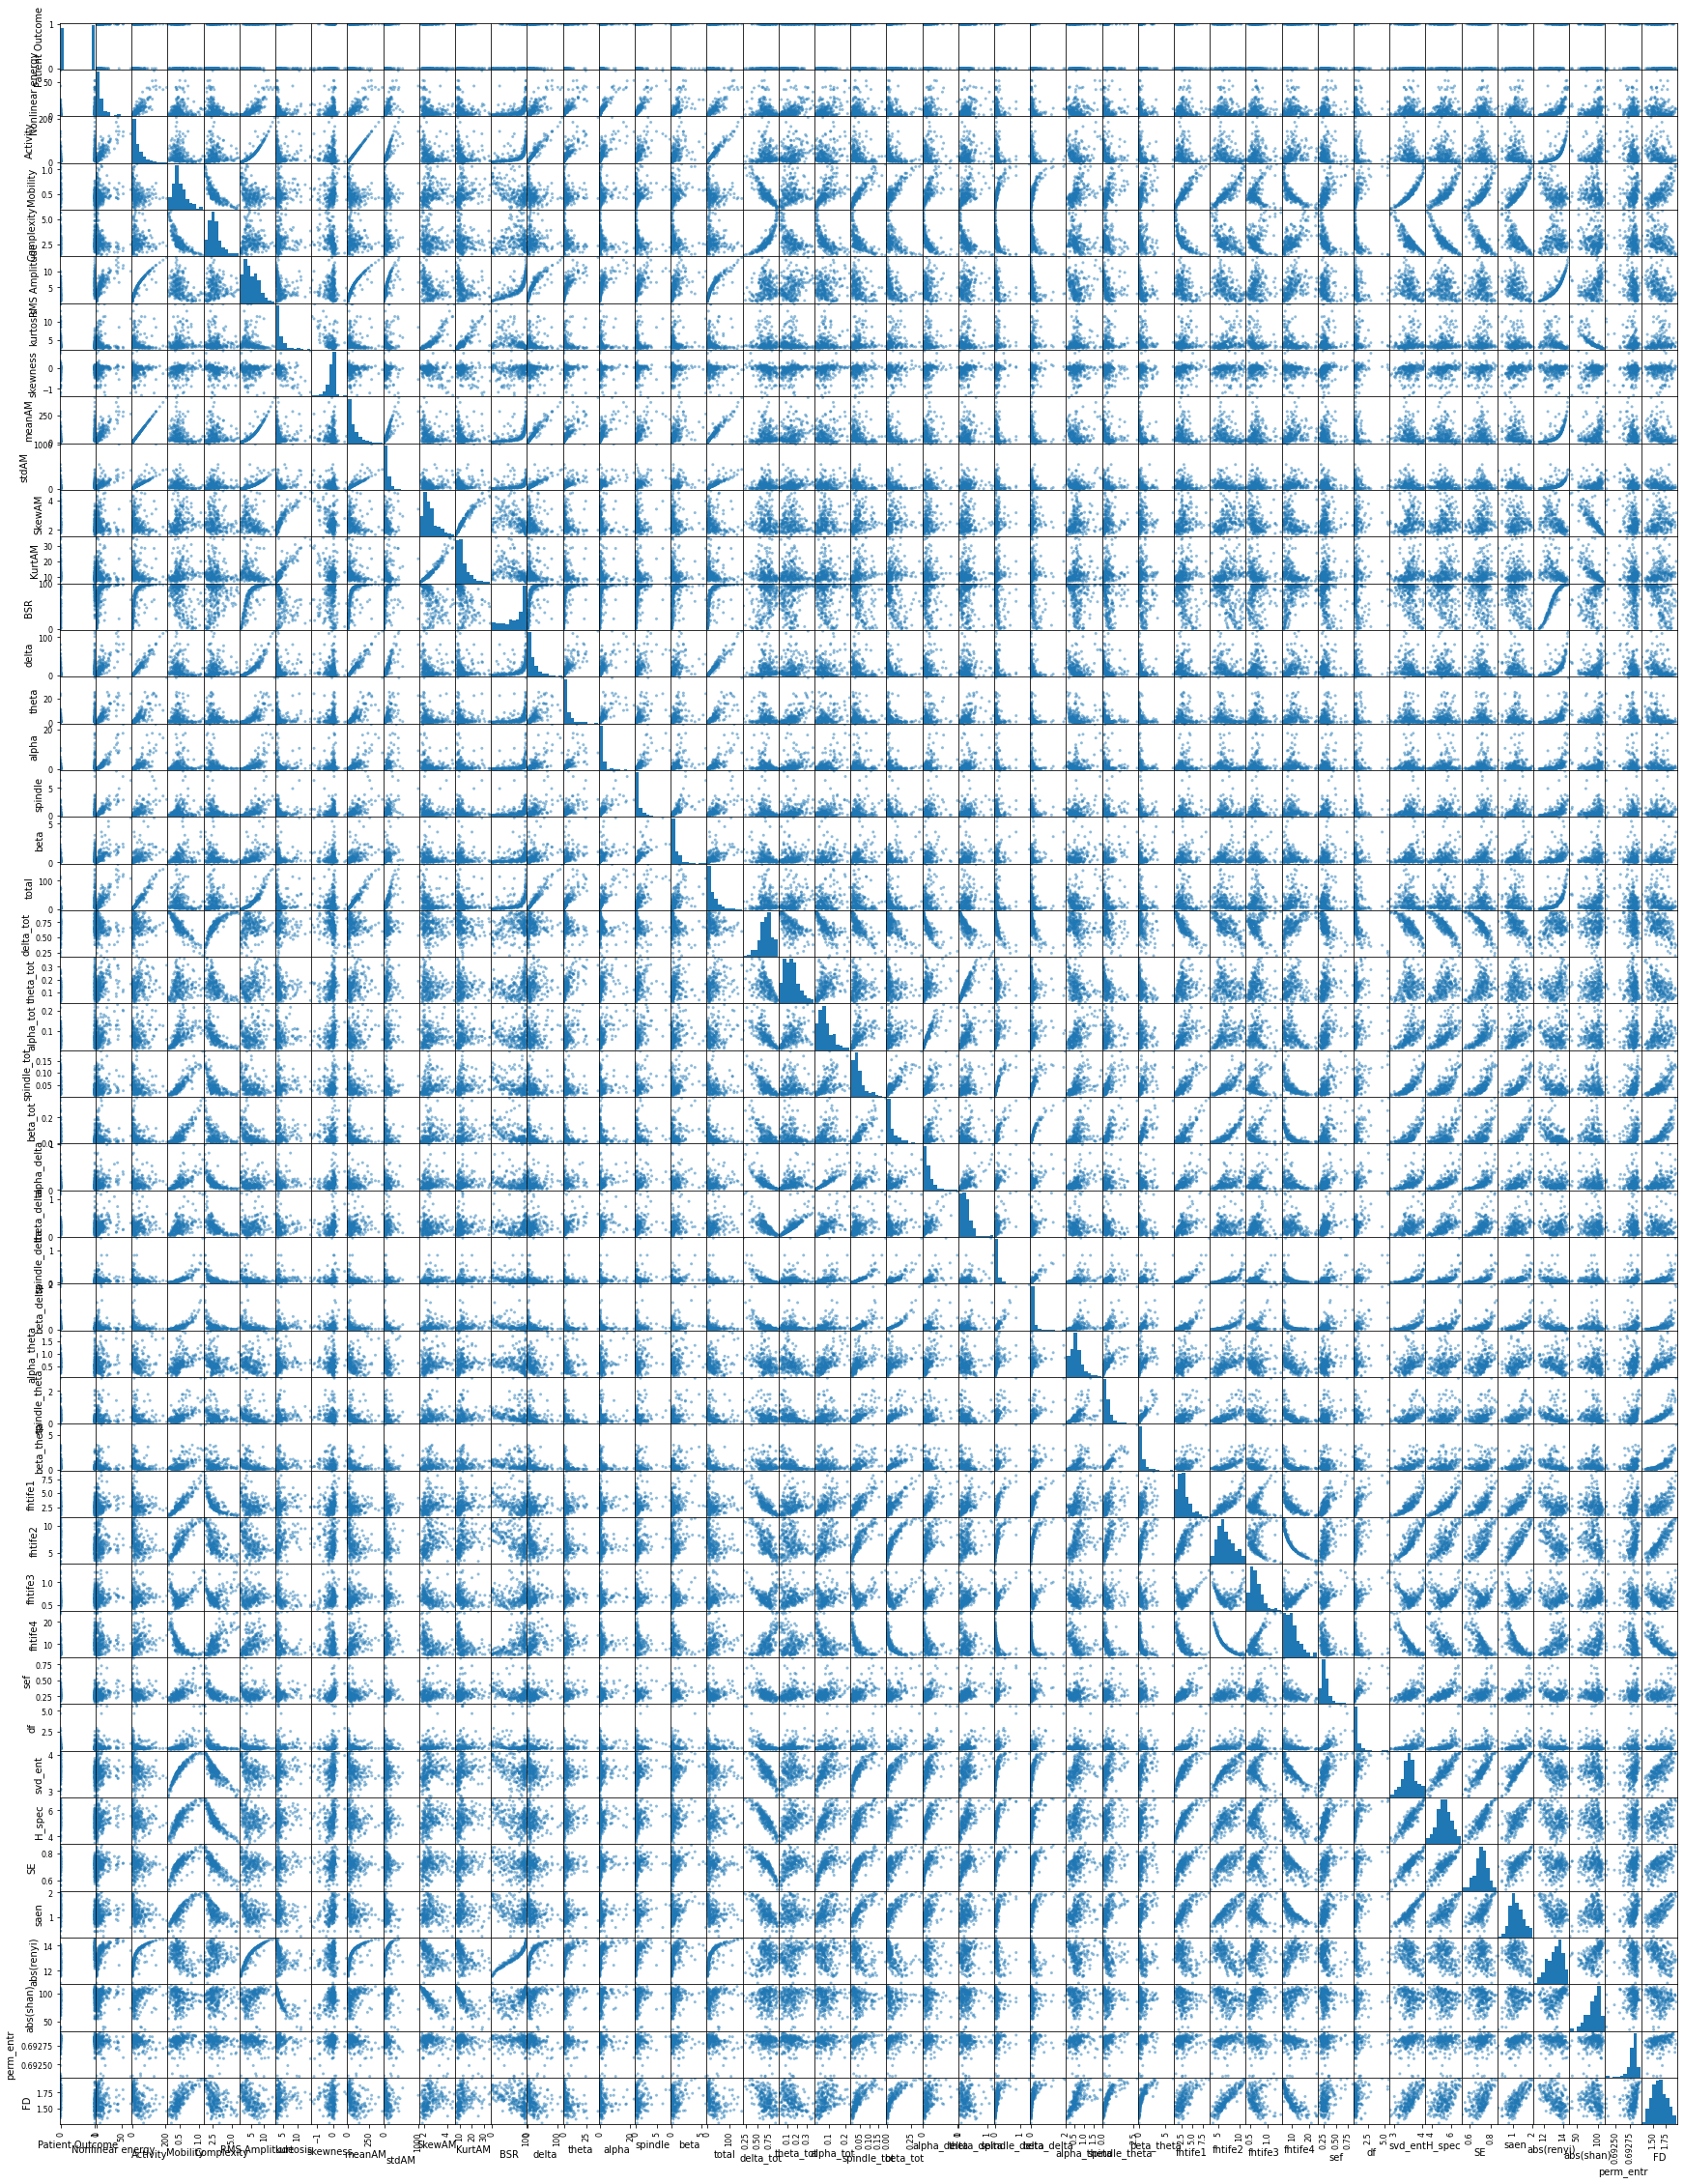

In [23]:
#more exploration of data through scatter plot after removal of outliers
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(30,40))
plt.show()

In [95]:
#dividethe data into labels and targets
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [14]:
#x.head

In [15]:
#y.head

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(  x, y, test_size=0.20, random_state=42)

In [99]:
# Feature Scaling to bring the variable in a single scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [100]:
# Fitting Naive Bayes Classification to the Training set with linear kernel
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(X_train, y_train)
results = cross_val_score(nvclassifier, X_train, y_train, cv=kfold)

In [101]:
# Predicting the Test set results
y_pred = nvclassifier.predict(X_test)
print(y_pred)

[1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1
 1 1 1 1 1 0 0 1 0 1 0 1]


In [102]:
#lets see the actual and predicted value side by side
y_compare = np.vstack((y_test,y_pred)).T
#actual value on the left side and predicted value on the right hand side
#printing the top 5 values
y_compare[:5,:]

array([[1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 0]], dtype=int64)

In [103]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[18  7]
 [ 4 20]]


In [104]:
#finding accuracy from the confusion matrix.
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print ('\n\nAccuracy of the Naive Bayes Clasification is: ', corrPred/(cm.sum()))

Correct predictions:  38
False predictions 11


Accuracy of the Naive Bayes Clasification is:  0.7755102040816326


# ROC AUC with confidence interval


In [105]:
from sklearn.metrics import roc_auc_score
from math import sqrt

def roc_auc_ci(y_true, y_score, positive=1):
    AUC = roc_auc_score(y_true, y_score)
    N1 = sum(y_true == positive)
    N2 = sum(y_true != positive)
    Q1 = AUC / (2 - AUC)
    Q2 = 2*AUC**2 / (1 + AUC)
    SE_AUC = sqrt((AUC*(1 - AUC) + (N1 - 1)*(Q1 - AUC**2) + (N2 - 1)*(Q2 - AUC**2)) / (N1*N2))
    lower = AUC - 1.96*SE_AUC
    upper = AUC + 1.96*SE_AUC
    if lower < 0:
        lower = 0
    if upper > 1:
        upper = 1
    return (lower, upper)

In [113]:
roc_auc_ci(y_test, y_pred_gau, positive=1)

(0.8063157408804635, 0.9903509257862031)

#SVM  Using Linear kernel

In [108]:
# Fitting SVC Classification to the Training set with linear kernel
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
svcclassifier = SVC(kernel = 'linear', random_state = 0)

kfold = KFold(n_splits=10)
svcclassifier.fit(X_train, y_train)
results = cross_val_score(svcclassifier, X_train, y_train, cv=kfold) #Cross validation on training set

In [110]:
# Predicting the Test set results
y_pred = svcclassifier.predict(X_test)


print(y_pred)

[ 1.19231907 -6.27737815  1.11876456 -0.75238846  0.31181808  2.47581899
  1.74536811  1.08491883 -1.97971484 -2.55523371 -3.3975018   2.33684291
 -8.843649    0.54902415 -0.65313426  0.04906322 -0.92069102 -4.92785509
 -0.59251925  0.60113608  1.42979989  2.5782115   0.8744394  -0.16629352
  0.82748573  0.26543569  1.03615084 -2.85400703 -0.96460727  0.79367332
  1.07766473 -2.334703   -0.86144991  0.84106202 -0.07899758  0.7456974
  0.98358742  0.78050608  1.31974878  2.95765193  1.66352638  1.64408853
 -4.51311124 -1.65486344  0.49079466 -1.07606919  0.49269563 -4.08289296
  1.12252978]


In [112]:
#roc_auc_ci(y_test, y_pred, positive=1)

(0.8063157408804635, 0.9903509257862031)

In [82]:

#lets see the actual and predicted value side by side
y_compare = np.vstack((y_test,y_pred)).T
#actual value on the left side and predicted value on the right hand side
#printing the top 5 values
y_compare[:5,:]

array([[1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1]], dtype=int64)

In [83]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[18  7]
 [ 2 22]]


In [84]:
#finding accuracy from the confusion matrix.
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
kernelLinearAccuracy = corrPred/(cm.sum())
print ('Accuracy of the SVC Clasification is: ', corrPred/(cm.sum()))

Correct predictions:  40
False predictions 9
Accuracy of the SVC Clasification is:  0.8163265306122449


# Using polynomial kernel

In [48]:
# Fitting SVC Classification to the Training set with linear kernel
from sklearn.svm import SVC
svcclassifier = SVC(kernel = 'poly', random_state = 0)
svcclassifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = svcclassifier.predict(X_test)
print(y_pred)

[1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 0 0 1 0 1 0 1]


In [49]:

#lets see the actual and predicted value side by side
y_compare = np.vstack((y_test,y_pred)).T
#actual value on the left side and predicted value on the right hand side
#printing the top 5 values
y_compare[:5,:]

array([[1, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [1, 0]], dtype=int64)

In [51]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#finding accuracy from the confusion matrix.
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
kernelPolyAccuracy = corrPred/(cm.sum())
print ('Accuracy of the SVC Clasification is: ', corrPred/(cm.sum()))

[[12 13]
 [ 1 23]]
Correct predictions:  35
False predictions 14
Accuracy of the SVC Clasification is:  0.7142857142857143


# Using Rbf kernel

In [53]:
# Fitting SVC Classification to the Training set with linear kernel
from sklearn.svm import SVC
svcclassifier = SVC(kernel = 'rbf', random_state = 0)
svcclassifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = svcclassifier.predict(X_test)
print(y_pred)

[1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1
 1 1 1 1 1 0 0 1 0 1 0 1]


In [54]:

#lets see the actual and predicted value side by side
y_compare = np.vstack((y_test,y_pred)).T
#actual value on the left side and predicted value on the right hand side
#printing the top 5 values
y_compare[:5,:]

array([[1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 0]], dtype=int64)

In [55]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#finding accuracy from the confusion matrix.
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
kernelRbfAccuracy = corrPred/(cm.sum())
print ('Accuracy of the SVC Clasification is: ', corrPred/(cm.sum()))

[[18  7]
 [ 3 21]]
Correct predictions:  39
False predictions 10
Accuracy of the SVC Clasification is:  0.7959183673469388


# Using sigmoid kernel

In [56]:
# Fitting SVC Classification to the Training set with linear kernel
from sklearn.svm import SVC
svcclassifier = SVC(kernel = 'sigmoid', random_state = 0)
svcclassifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = svcclassifier.predict(X_test)
print(y_pred)

[1 0 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0
 1 1 1 1 1 0 0 1 0 1 0 0]


In [57]:
#lets see the actual and predicted value side by side
y_compare = np.vstack((y_test,y_pred)).T
#actual value on the left side and predicted value on the right hand side
#printing the top 5 values
y_compare[:5,:]

array([[1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1]], dtype=int64)

In [58]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#finding accuracy from the confusion matrix.
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
kernelSigmoidAccuracy = corrPred/(cm.sum())


print('\n\nAccuracy of SVC classfication with different kernels are :\n\n\n')
print ('Accuracy of the SVC Clasification with Linear kernel and no other adjust is: \t\t\t', kernelLinearAccuracy)
print ('Accuracy of the SVC Clasification with Polynomial kernel and no other adjust is: \t\t', kernelPolyAccuracy)
print ('Accuracy of the SVC Clasification with Radial Basis Function kernel and no other adjust is: \t', kernelRbfAccuracy)
print ('Accuracy of the SVC Clasification with Sigmoid kernel and no other adjust is: \t\t\t', kernelSigmoidAccuracy)

[[19  6]
 [ 8 16]]
Correct predictions:  35
False predictions 14


Accuracy of SVC classfication with different kernels are :



Accuracy of the SVC Clasification with Linear kernel and no other adjust is: 			 0.8163265306122449
Accuracy of the SVC Clasification with Polynomial kernel and no other adjust is: 		 0.7142857142857143
Accuracy of the SVC Clasification with Radial Basis Function kernel and no other adjust is: 	 0.7959183673469388
Accuracy of the SVC Clasification with Sigmoid kernel and no other adjust is: 			 0.7142857142857143
